# Imports 

In [1]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Introduction to the Class Graph
#### We created a class for the Graph we want to create, including the nodes and edges, the different metrics, asa well as the functionalities 1-4

In [2]:
class Graph(object):
    '''
    Graph Data Structure, undirected 
    '''
    
    def __init__(self):
        self.adjacency = defaultdict(set)
        self.coordinates = {}
        self.adj_list_d = defaultdict(list)
        self.adj_list_t = defaultdict(list)
        self.adj_list_n = defaultdict(list)
        
    def add(self, node1, node2):
        ''' Add connection between node1, node2'''
        self.adjacency[int(node1)].add(int(node2))
        self.adjacency[int(node2)].add(int(node1))
        #self.net[int(node1), int(node2)] = 1
    
    def distance(self, node1, node2, d):
        ''' Create the distance measure between node1 and node2 '''
        #self.dis[(int(node1), int(node2))] = int(d)
        if [int(d), int(node2)] not in self.adj_list_d[int(node1)]:
            self.adj_list_d[int(node1)].append([int(d), int(node2)])
            self.adj_list_d[int(node2)].append([int(d), int(node1)])
            self.adj_list_n[int(node1)].append([1, int(node2)])
            self.adj_list_n[int(node2)].append([1, int(node1)])
        
    def time(self, node1, node2, t):
        ''' Create the time distance measure between node 1 and node 2'''
        
        #self.tim[(int(node1), int(node2))] = int(t)
        if [ int(t), int(node2)] not in  self.adj_list_t[int(node1)]:
            self.adj_list_t[int(node1)].append([ int(t), int(node2)])
            self.adj_list_t[int(node2)].append([int(t), int(node1)])
        
    def coordinate(self, node, coordinate1, coordinate2):
        '''Save the coordinates of every node'''
        self.coordinates[int(node)] = [int(coordinate1), int(coordinate2)]
    
    def nodes_(self):
        ''' All the nodes of the graph '''
        return list(set(self.adjacency.keys()))
    
    def edges(self):
        ''' Return all the edges of the graph '''
        return list(self.dis.keys())
    
    def print_adj_list_d(self):
        for keys, values in self.adj_list_d.items():
            print(keys, values)
            
    def print_adj_list_t(self):
        for keys, values in self.adj_list_d.items():
            print( keys, values)
    '''DFS for the first functionality because we just need neighbors at distance less than dist'''      
    def dfs(self, startnode, visited, dist, kind): #kind is a function that will be used to recall self.adj_list_d,t or n in base of the user request
        if visited is None:
            visited = set() 
        visited.add(startnode)
        for i in kind[startnode]:
            if i[1] not in visited:
                if i[0] < dist:
                    self.dfs(i[1], visited, dist-i[0], kind)
        return visited
    
    def functionality1(self):
        startnode = int(input("Give me the node as a number: \n "))
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        dist = int(input("Put a number as threshold distance: \n "))
        if measure == 1:
            return (self.dfs(startnode, None, dist, self.adj_list_d), measure)
        elif measure == 2:
            return (self.dfs(startnode, None,dist, self.adj_list_t), measure)
        elif measure == 3 :
            return (self.dfs(startnode, None, dist, self.adj_list_n), measure)
        
    '''This Dijsktra return a list of nodes that you will touch in the minimum path.
    The code works exactly like the dijsktra method renewing each time the weight and predecessor of a node. 
    We point the attention that the weights arer always counted for all the path, so every node
    in shortest_paths will have a weight assocviated to a path, not only a couple of nodes'''
    def dijsktra(self, initial, end, kind):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
        shortest_paths = {initial: (None, 0)}
        current_node = initial
        visited = set()
    
        while current_node != end:
            visited.add(current_node)
            destinations = kind[current_node]
            weight_to_current_node = shortest_paths[current_node][1]

            for next_node in destinations:
                weight = next_node[0] + weight_to_current_node
                if next_node[1] not in shortest_paths:
                    shortest_paths[next_node[1]] = (current_node, weight)
                else:
                    current_shortest_weight = shortest_paths[next_node[1]][1]
                    if current_shortest_weight > weight:
                        shortest_paths[next_node[1]] = (current_node, weight)
            next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
            if not next_destinations:
               # return "Route Not Possible" as a [] that later on will be checked if it remains so
                return [],[]
        # next node is the destination with the lowest weight in the second component
            current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
           
    
    # Work back through destinations in shortest path
        path = []
        while current_node is not None:
            path.append(current_node)
            next_node = shortest_paths[current_node][0]
            current_node = next_node
        
        path = path[::-1]
        tup = []
        for i in range(len(path)-1):
            tup.append((path[i], path[i+1]))
        return tup, shortest_paths[end][1]
    
    def dijsktrafor2(self, nodes, kind):
        #a list of tuples, each one a permutation of the nodes the user gave.
        permuTuples = list(itertools.permutations(nodes))
        final_path = []
        weight_final =999999999999 #a enormou wight that will be conunted as starting point
        for i in permuTuples:
            obj = list(i)
            path = []
            weight = 0
            lenpath = 0
            for j in range(len(obj)-1):
                A, B = self.dijsktra(obj[j], obj[j+1], kind)
                if A == [] and B == []:
                    break
                path.append(A)
                weight = weight + B
            if weight < weight_final:
                weight_final = weight
                final_path = path
        to_print = []
        #print(final_path)
        if final_path == []:
            return ("No path possible")
        for i in final_path:
               for j in i:
                    to_print.append(j)
        return to_print

    def functionality2(self):
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.').split()]
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        if measure == 1:
            return (self.dijsktrafor2(startnodes,self.adj_list_d), startnodes, measure)
        elif measure == 2:
            return (self.dijsktrafor2(startnodes,self.adj_list_t), startnodes, measure)
        elif measure == 3 :
            return (self.dijsktrafor2(startnodes,self.adj_list_n), startnodes, measure)
    
    
    def dijsktrafor3(self, startnode, nodes, kind):
        nodi = [startnode]
        for i in nodes:
            nodi.append(i)
        final_path = []
        final_weight = 0
        to_print = []
        for i in range(len(nodi)-1):
            A, B = self.dijsktra(nodi[i], nodi[i+1], kind)
            if A == []:
                    return 'No path ordered allowed'
            final_weight += B
            final_path.append(A)
        for i in final_path:
            for j in i:
                to_print.append(j)
        return to_print
    
    def functionality3(self):
        H_n = int(input('Write the number associated to the starting node.\n'))
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.\n').split()]
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        if measure == 1:
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_d), H_n, startnodes, measure)
        elif measure == 2:
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_t), H_n, startnodes, measure)
        elif measure == 3 :
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_n), H_n, startnodes, measure)
        
        
    def dijsktrafor4(self, startnode, nodes, endnode, kind):
        permuTuples = list(itertools.permutations(nodes))
        #count = 0
       # if len(nodes)>7:
         #   euristic = 
        final_path = []
        weight_final =999999999999 
        for i in permuTuples:
            obj = [startnode]
            for k in i:
                obj.append(k)
            obj.append(endnode)
            path = []
            weight = 0
            lenpath = 0
            for j in range(len(obj)-1):
                A, B = self.dijsktra(obj[j], obj[j+1], kind)
                if A == []:
                    break
                path.append(A)
                weight = weight + B
            if weight < weight_final:
                weight_final = weight
                final_path = path
        to_print = []
        #print(final_path)
        if final_path == []:
            return ("No path possible")
        for i in final_path:
               for j in i:
                    to_print.append(j)
        return to_print
        
        
        
    def functionality4(self):
        H_n = int(input('Write the number associated to the starting node.\n'))
        startnodesp = [int(x) for x in input('Write the nodes, each one spaced from the other, remember the last one will be always our end point.\n').split()]
        endnode = startnodesp[-1]
        startnodes = startnodesp[:-1]
        measure = int(input("We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. \n "))
        if measure == 1:
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_d), H_n, startnodesp, measure)
        elif measure == 2:
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_t), H_n, startnodesp, measure)
        elif measure == 3 :
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_n), H_n, startnodesp, measure)
        
    def visualization1(self):
        plt.figure()
        plt.figure(figsize=(30,30)) 
        I = nx.Graph()
        f_1, m = self.functionality1()
        for ele in list(f_1):
            I.add_node(ele)
            I.add_edge(list(f_1)[0], ele)
        pos = {}
        labels = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        source = list(f_1)[0]
        #nx.draw(I, pos=pos)
        nx.draw_networkx_labels(G, pos, labels, font_size= 16 , alpha = 0.5)
        nx.draw_networkx_nodes(I, pos, nodelist=[source], node_color="crimson", node_size = 500)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference({source})), node_color="moccasin")
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width =2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualization2(self):
        I = nx.Graph()
        f_2, start, m = self.functionality2()
        for ele in f_2:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        plt.figure()
        plt.figure(figsize=(12,15)) 
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in start}, 
                            font_size= 16 , alpha = 0.8)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(start))), node_color="lavender", node_size = 5)
        nx.draw_networkx_nodes(I, pos, nodelist=start, node_color="moccasin", node_size = 400)
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualization3(self):
        I = nx.Graph()
        f_3, start_nodes, nodes, m = self.functionality3()
        for ele in f_3:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        plt.figure()
        plt.figure(figsize=(30,30)) 
        al = nodes
        al.append(start_nodes)
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in al}, 
                                font_size= 16 , alpha = 0.8)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(al))), node_color="lavender", node_size = 5)
        nx.draw_networkx_nodes(I, pos, nodelist=nodes, node_color="moccasin", node_size = 400)
        nx.draw_networkx_nodes(I, pos, nodelist=[start_nodes], node_color="crimson", node_size = 500)
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualisation4(self):
        I = nx.Graph()
        f_4, start_nodes, nodes, m = self.functionality4()
        for ele in f_4:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        plt.figure()
        plt.figure(figsize=(30,30)) 
        al = nodes
        al.append(start_nodes)
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in al}, 
                                    font_size= 16 , alpha = 0.8)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(al))), node_color="lavender", node_size = 5)
        nx.draw_networkx_nodes(I, pos, nodelist=nodes, node_color="moccasin", node_size = 400)
        nx.draw_networkx_nodes(I, pos, nodelist=[start_nodes], node_color="crimson", node_size = 500)
        if m == 1:  
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()

# Reading the Data

In [3]:
G = Graph()

In [4]:
with open(r"C:\Users\HP\Documents\ADM\HW 5\USA-road-d.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.distance(ww[1], ww[2], ww[3])
        n += 1

In [5]:
with open(r"C:\Users\HP\Documents\ADM\HW 5\USA-road-t.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.time(ww[1], ww[2], ww[3])
        n += 1

In [6]:
with open(r"C:\Users\HP\Documents\ADM\HW 5\USA-road-co.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.coordinate(ww[1], ww[2], ww[3])
        n += 1

Give me the node as a number: 
 2319
We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. 
 1
Put a number as threshold distance: 
 12345


<Figure size 432x288 with 0 Axes>

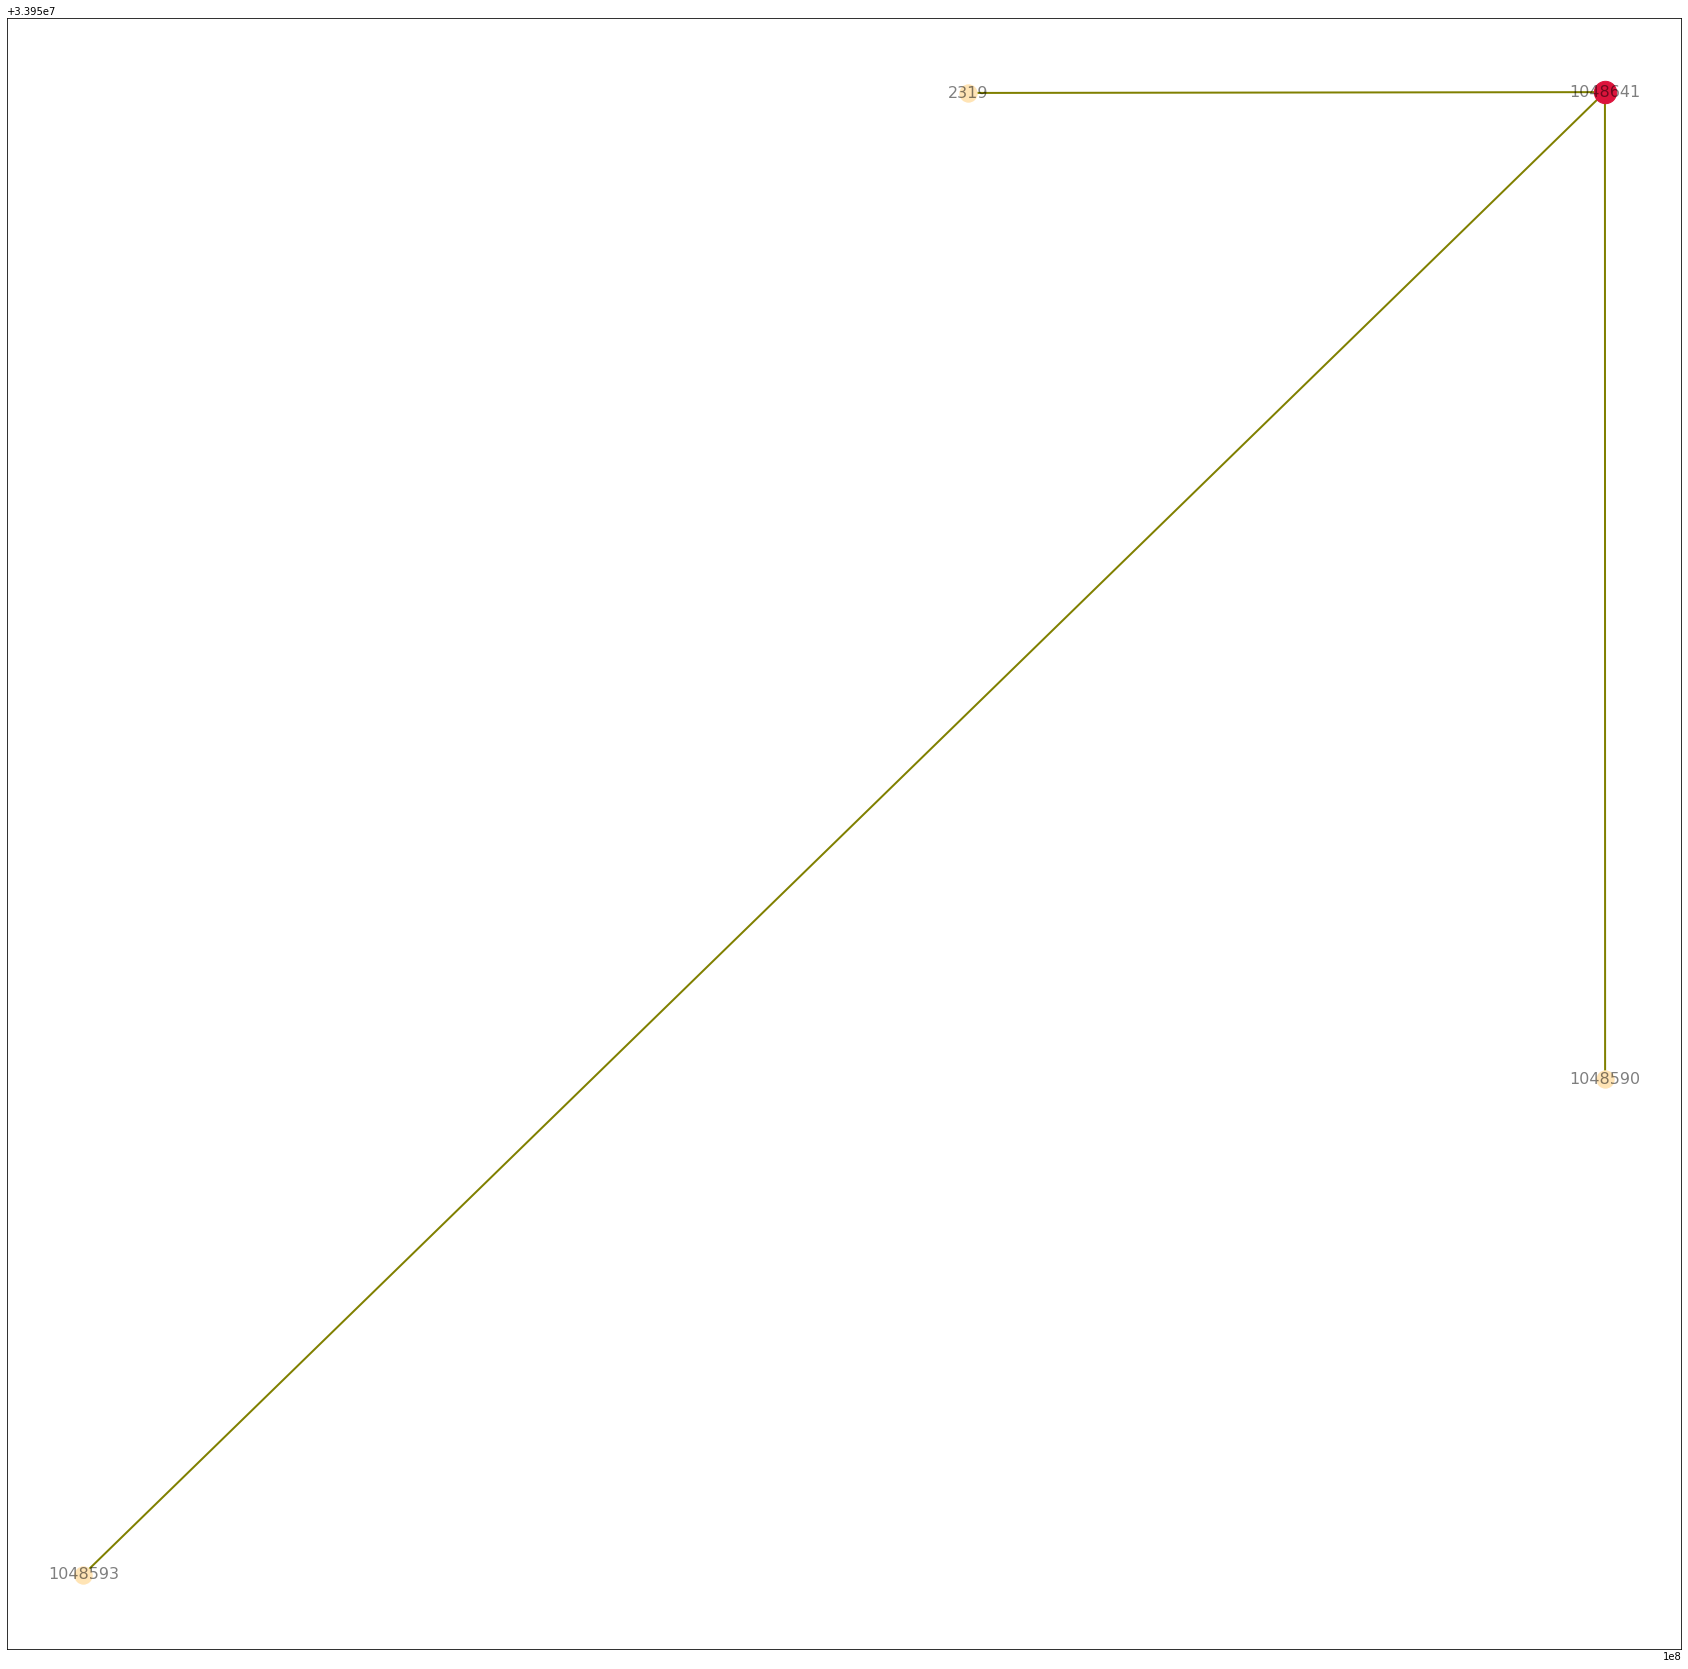

In [15]:
G.visualization1()

Write the nodes, each one spaced from the other.1 123 2319 1048674 133
We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. 
 1


C:\Users\HP\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 432x288 with 0 Axes>

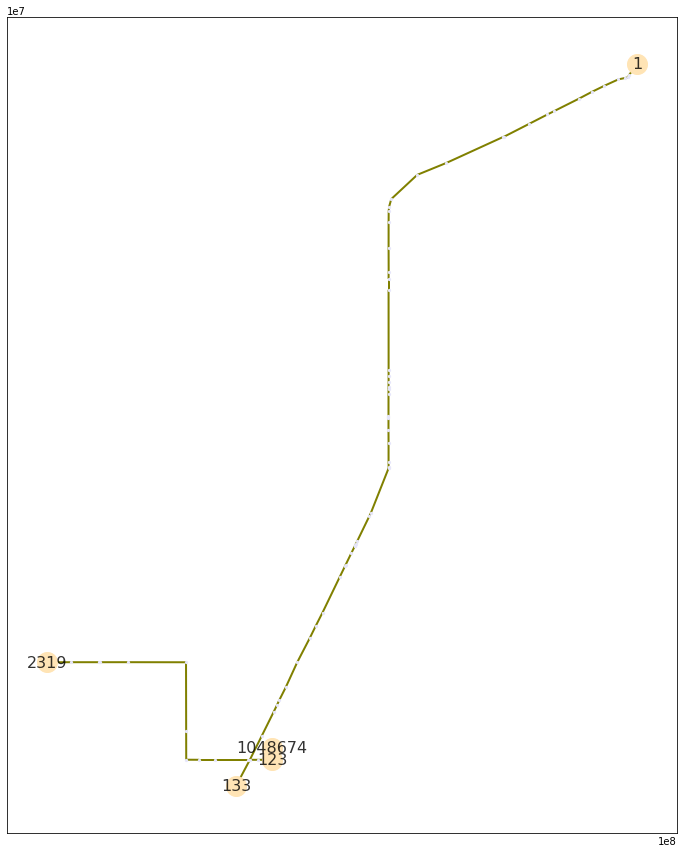

In [16]:
G.visualization2()

Write the number associated to the starting node.
126
Write the nodes, each one spaced from the other.
15 1050427 1048592 153 2672
We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. 
 1


C:\Users\HP\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 432x288 with 0 Axes>

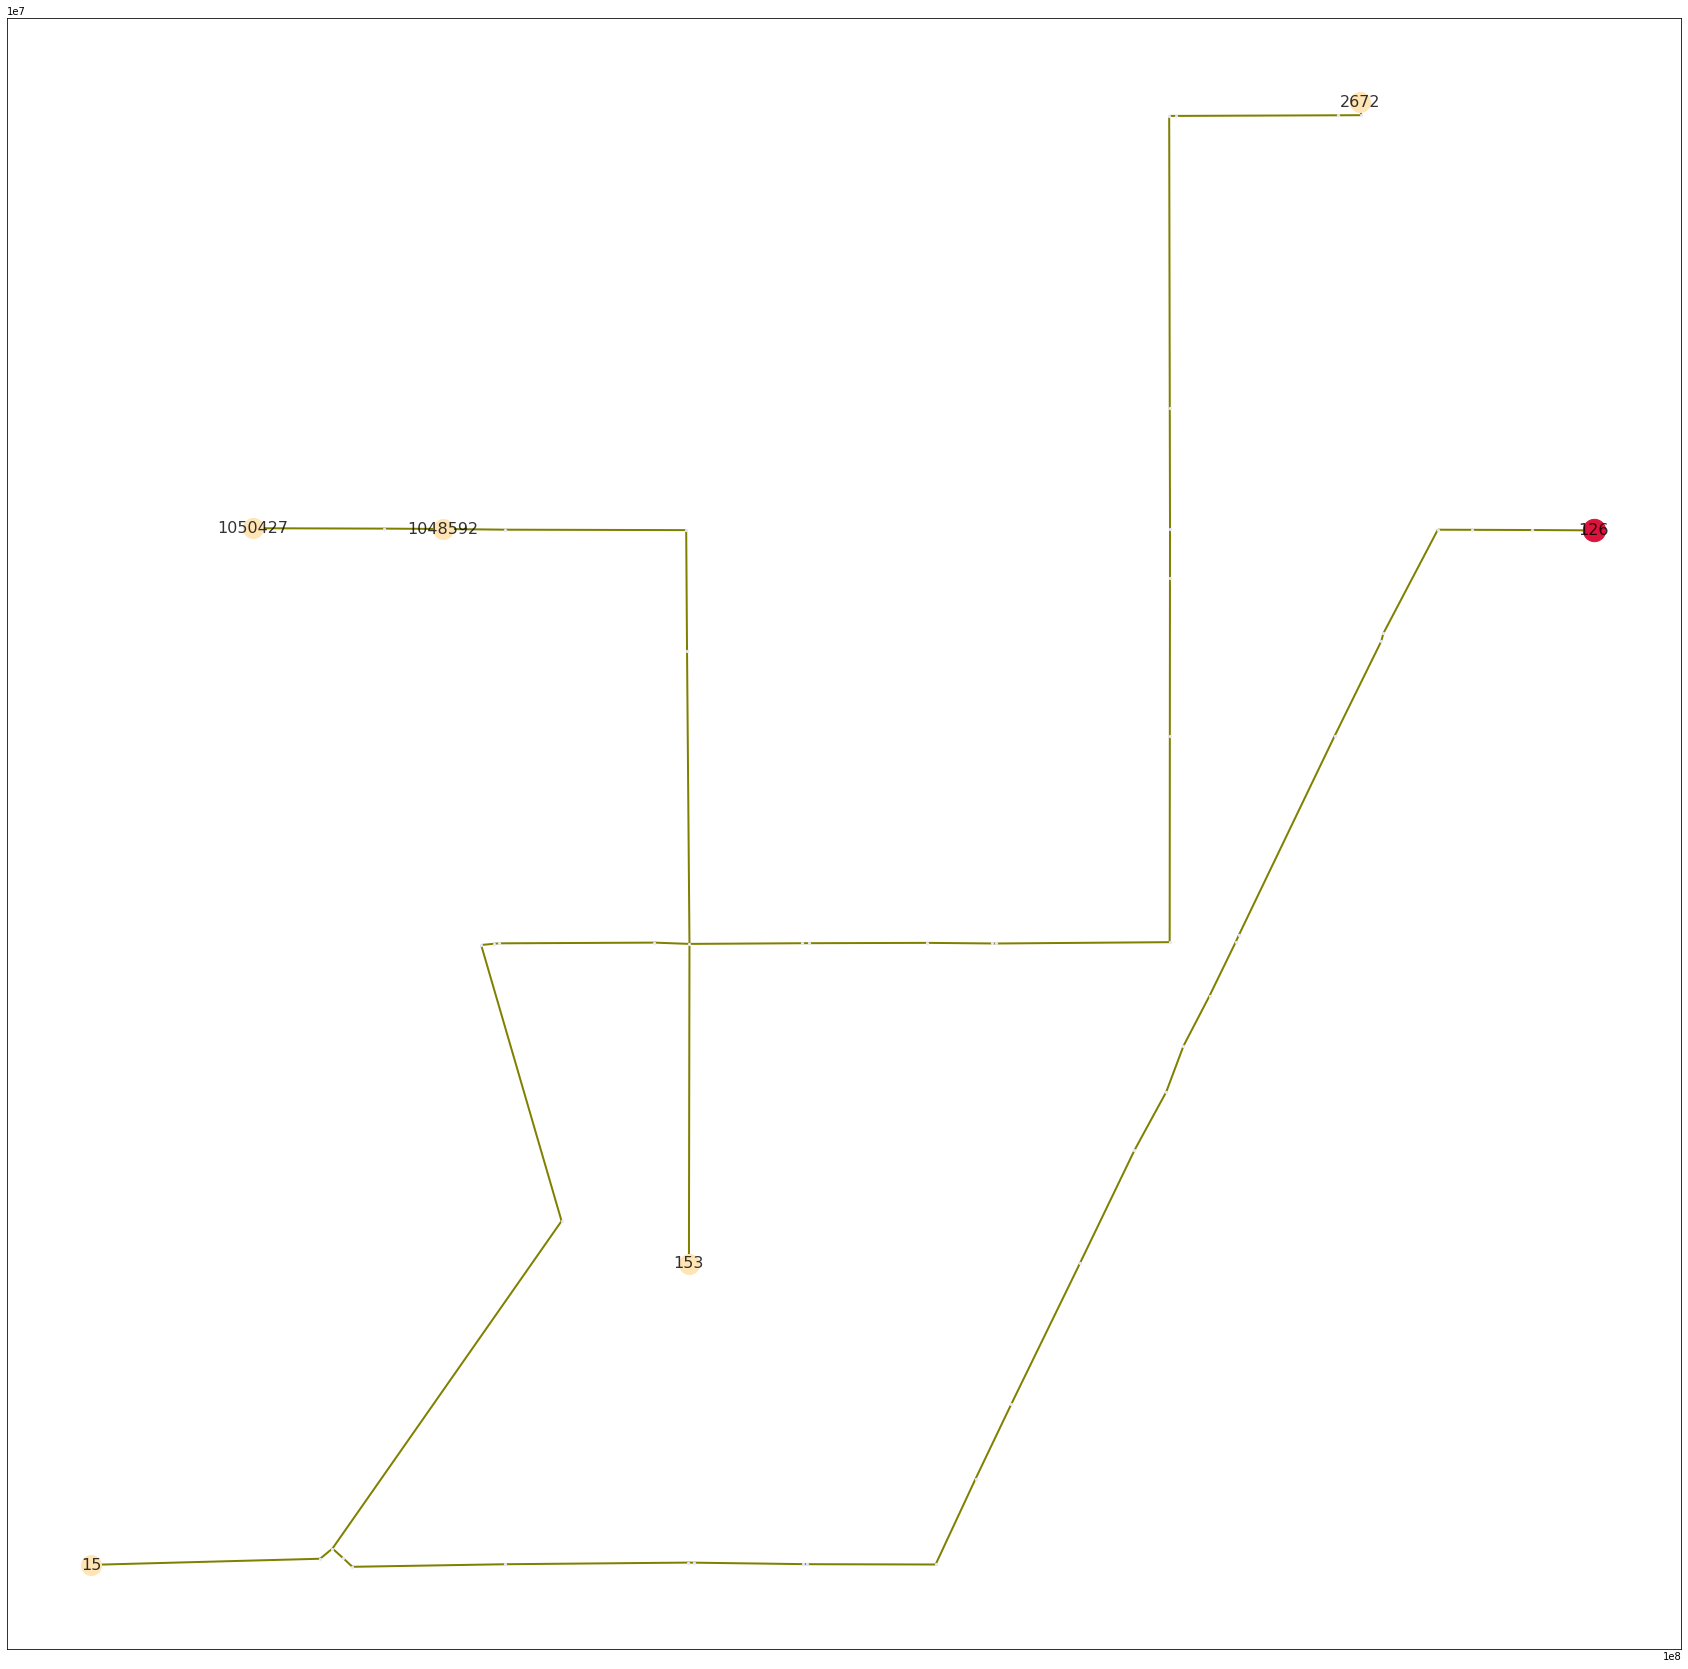

In [17]:
G.visualization3()

Write the number associated to the starting node.
19
Write the nodes, each one spaced from the other, remember the last one will be always our end point.
25 14 67 2671 1048594
We need a function to claculate the distance, if you want metric distance digit 1, time distance 2, network distance 3. 
 1


C:\Users\HP\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 432x288 with 0 Axes>

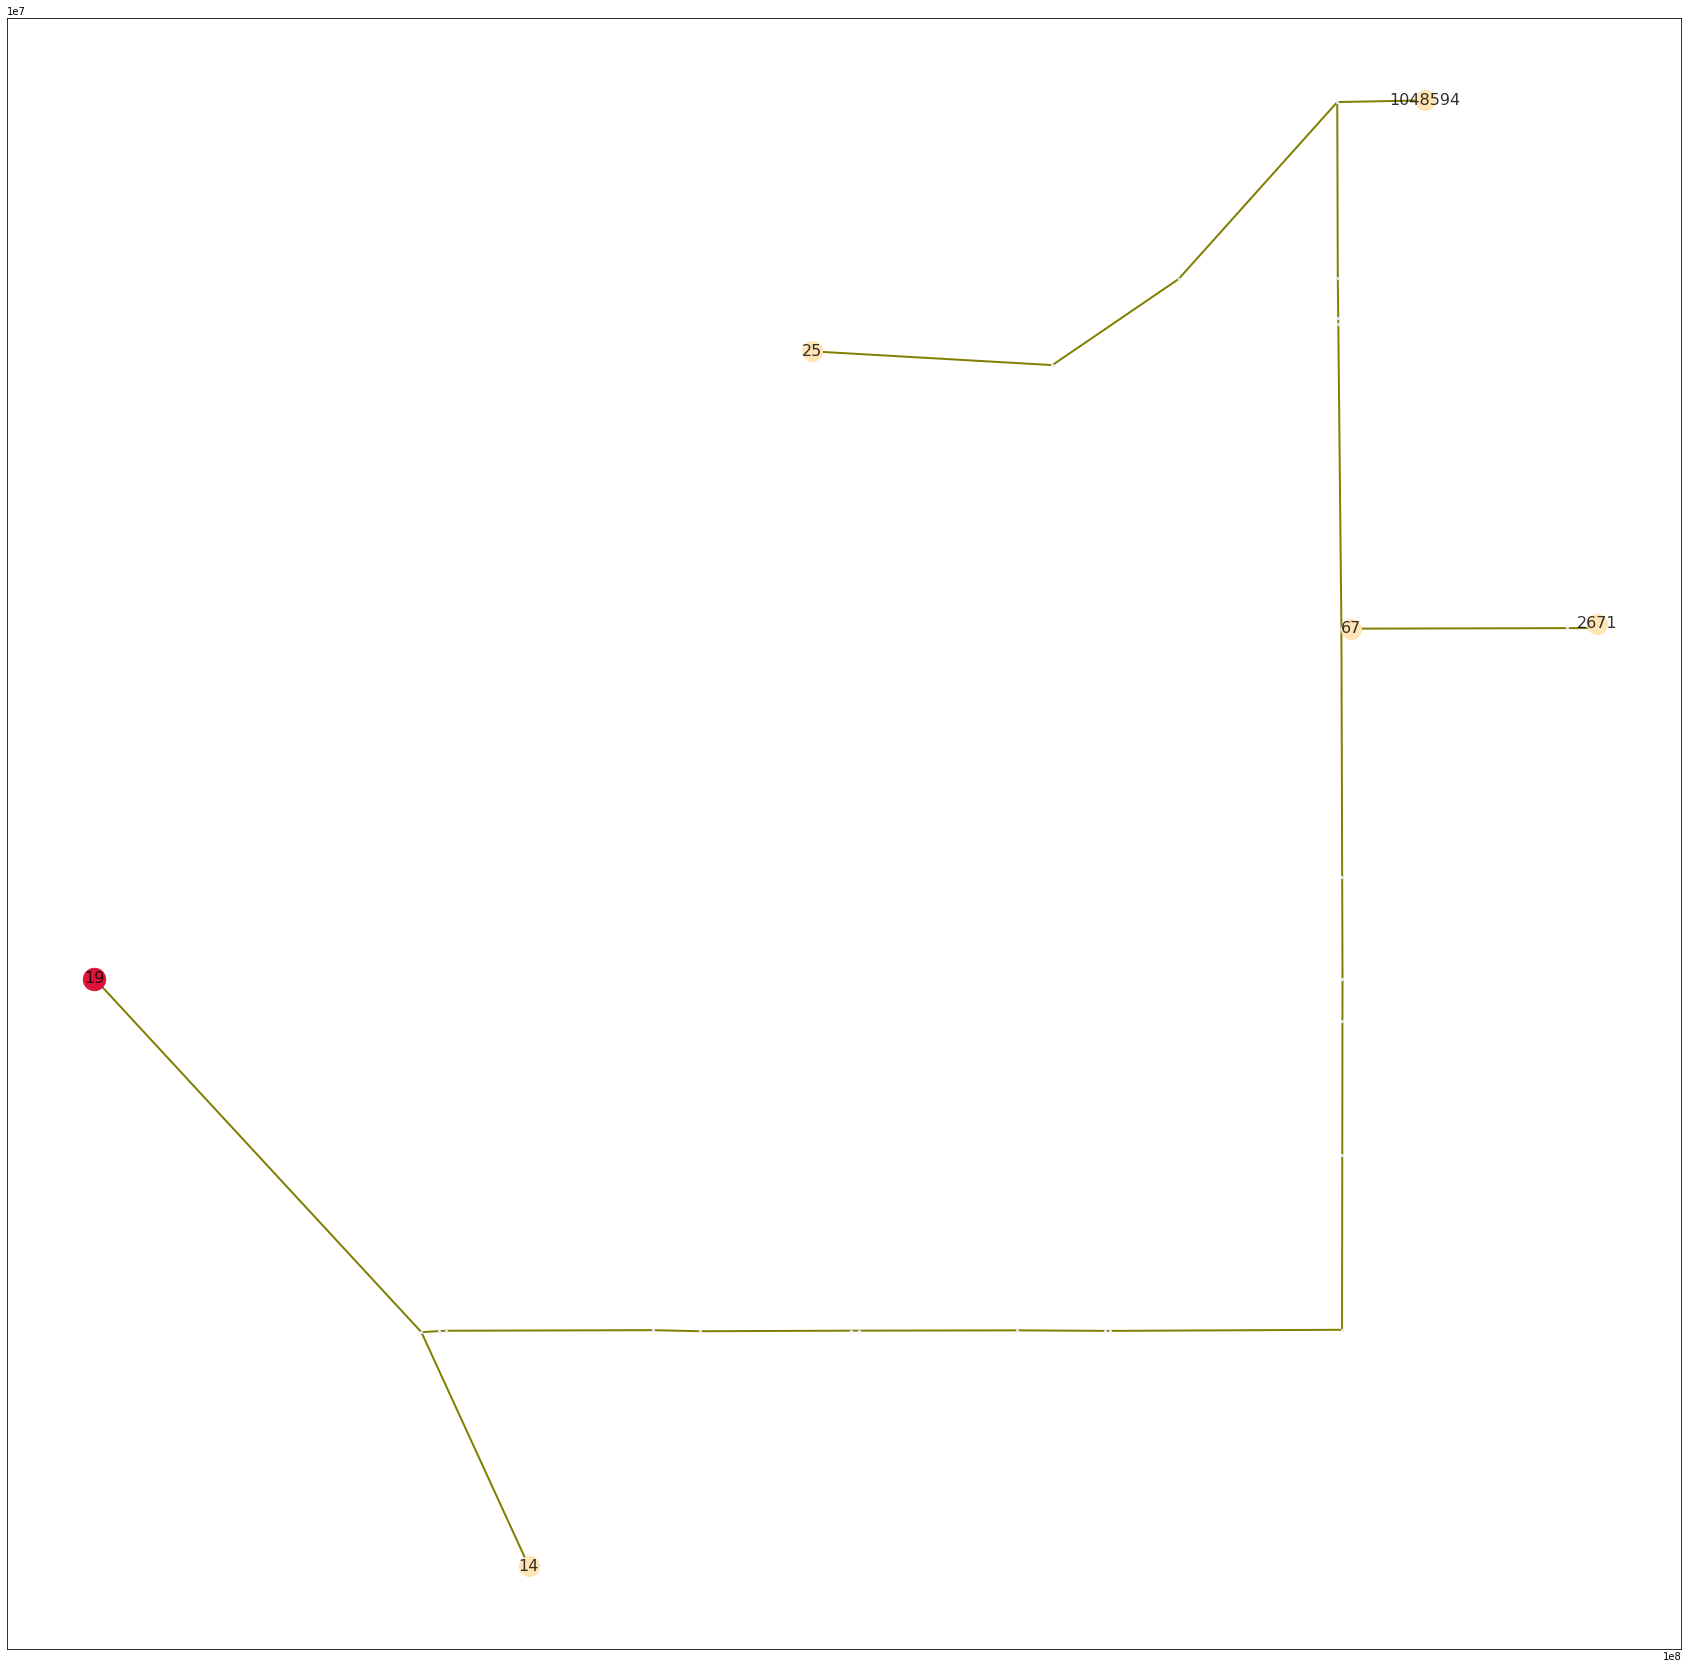

In [18]:
G.visualisation4()